# Config

In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches



In [11]:
YEAR = 2024

# Read Data

In [12]:
df = pd.read_csv('../data/Accidents in Barcelona.csv')
print(df.shape)
print(df.columns)

(52041, 27)
Index(['filenumber', 'district_name', 'neighborhood_name', 'street_name',
       'day_of_week', 'timestamp', 'shift', 'cause', 'hour', 'month', 'year',
       'uninjured', 'slight_injuries', 'serious_injuries', 'deaths',
       'people_involved', 'pedestrian_count', 'bicycle_count', 'scooter_count',
       'victims', 'superilles', 'singleplatform', 'superilles_categories',
       'singleplatform_categories', 'category', 'n_vehicles_involved', 'geom'],
      dtype='object')


# Process data


In [13]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.GeoSeries.from_wkt(df['geom']), crs="EPSG:4326"
)
gdf.head(1)

,filenumber,district_name,neighborhood_name,street_name,day_of_week,timestamp,shift,cause,hour,month,...,scooter_count,victims,superilles,singleplatform,superilles_categories,singleplatform_categories,category,n_vehicles_involved,geom,geometry
0,2018S005817,Sants-Montjuïc,la Marina del Prat Vermell,Litoral (Besòs) ...,Friday,2018-07-27 15:00:00 UTC,Afternoon,Not the cause of the pedestrian,15,7,...,0,2,False,False,False,False,Non applicable,5,POINT(2.125569 41.341339),POINT (2.12557 41.34134)


In [14]:
# get only last year 
gdf = gdf[gdf['year'] == YEAR]


In [15]:
gdf["max_severity"] = np.select(
    [
        gdf["deaths"] > 0,
        gdf["serious_injuries"] > 0,
        gdf["slight_injuries"] > 0
    ],
    [
        "Fatal",
        "Serious",
        "Slight"
    ],
    default="No injury"
)


In [16]:
severity_order = ["No injury", "Slight", "Serious", "Fatal"]
gdf["max_severity"] = pd.Categorical(
    gdf["max_severity"],
    categories=severity_order,
    ordered=True
)


# Metrics

In [6]:
gdf["year"].value_counts(dropna=False).sort_index()


year
2024    7324
Name: count, dtype: int64

In [8]:
gdf["people_involved"].describe()


count    7324.000000
mean        2.061305
std         0.915483
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        14.000000
Name: people_involved, dtype: float64

In [ ]:
gdf["year"].value_counts(dropna=False).sort_index()


In [19]:
gdf["max_severity"].value_counts(dropna=False).sort_index()

max_severity
No injury     780
Slight       6299
Serious       225
Fatal          20
Name: count, dtype: int64

# Visualize data

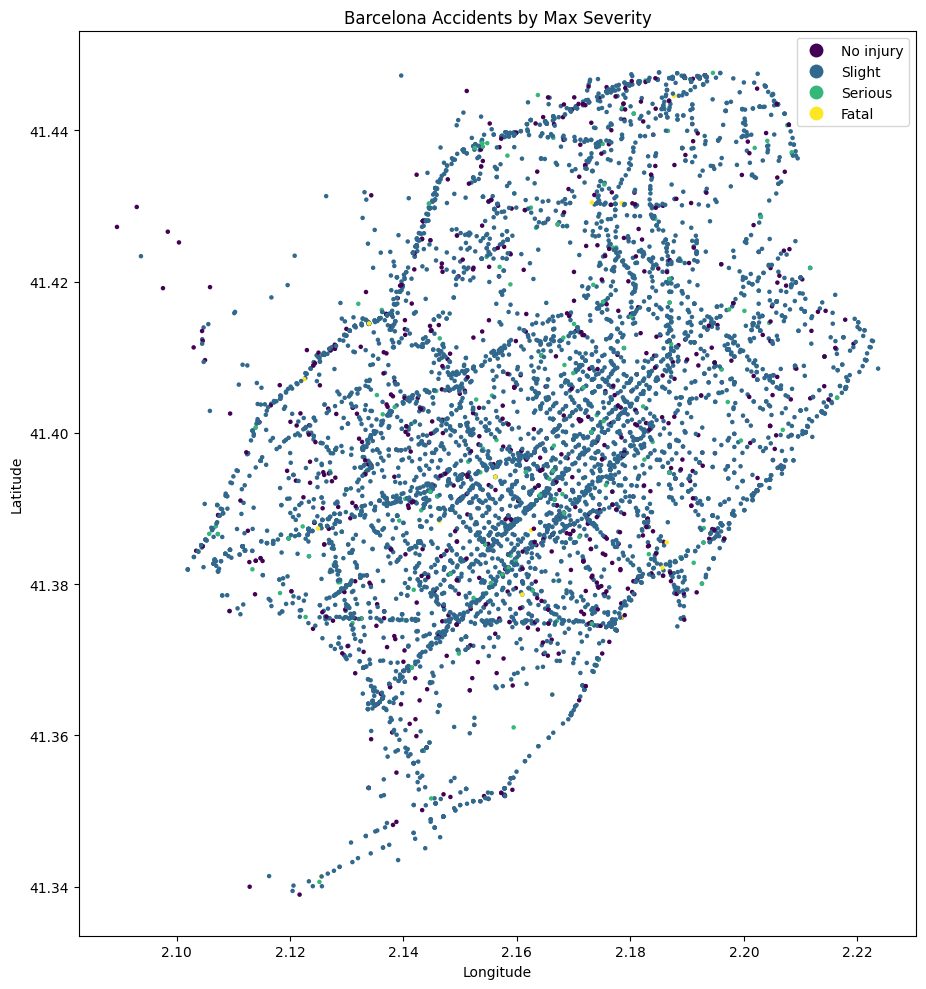

In [20]:
gdf.plot(
    column='max_severity',
    legend=True,
    figsize=(12, 10),
    markersize=5,
    cmap='viridis'
)
plt.title('Barcelona Accidents by Max Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


# Save data



In [21]:
gdf.to_crs(epsg=4326, inplace=True)  # Convert to WGS84 for GeoJSON compatibility
gdf["Evaluation"] = 'Accessible'
gdf.to_file(
    f"../data/accidents{YEAR}.geojson", driver='GeoJSON', index=False)
